Step 1:

We first load the Mall Customer dataset to understand its structure and content. This step helps us identify the columns, data types, and any potential data quality issues. Let’s explore the first few rows of the dataset and check for null values.

In [ ]:
import pandas as pd

def load_and_explore_dataset(file_path):
    """
    Load the dataset and explore its basic structure.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        DataFrame: Loaded dataset.
    """
    # Load dataset
    data = pd.read_csv(file_path)

    # Display basic information
    print("Dataset Information:")
    print(data.info())
    print("\nFirst 5 Rows of the Dataset:")
    print(data.head())

    return data

# Load the dataset
file_path = '/content/Mall_Customers.csv'  # Adjust the path if necessary
dataset = load_and_explore_dataset(file_path)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 Rows of the Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Step 2: Data Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(data):
    """
    Preprocess the dataset by removing irrelevant columns, encoding categorical variables,
    and scaling numerical features.

    Args:
        data (DataFrame): The raw dataset.

    Returns:
        DataFrame: Preprocessed dataset ready for clustering.
    """
    # Drop the 'CustomerID' column
    data = data.drop(columns=['CustomerID'])

    # Encode 'Gender' column
    encoder = LabelEncoder()
    data['Gender'] = encoder.fit_transform(data['Gender'])

    # Scale numerical features
    scaler = StandardScaler()
    numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data

# Preprocess the dataset
preprocessed_data = preprocess_data(dataset)

# Display preprocessed data
print("Preprocessed Data (First 5 Rows):")
print(preprocessed_data.head())

Preprocessed Data (First 5 Rows):
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.424569           -1.738999               -0.434801
1       1 -1.281035           -1.738999                1.195704
2       0 -1.352802           -1.700830               -1.715913
3       0 -1.137502           -1.700830                1.040418
4       0 -0.563369           -1.662660               -0.395980


(Statistical Analysis):

Before applying clustering, it is essential to understand the relationships among numerical variables. By generating a correlation heatmap, we identify significant correlations that can guide the clustering process and interpret meaningful patterns within the data. The heatmap highlights the strength and direction of correlations between features such as Age, Annual Income, and Spending Score.

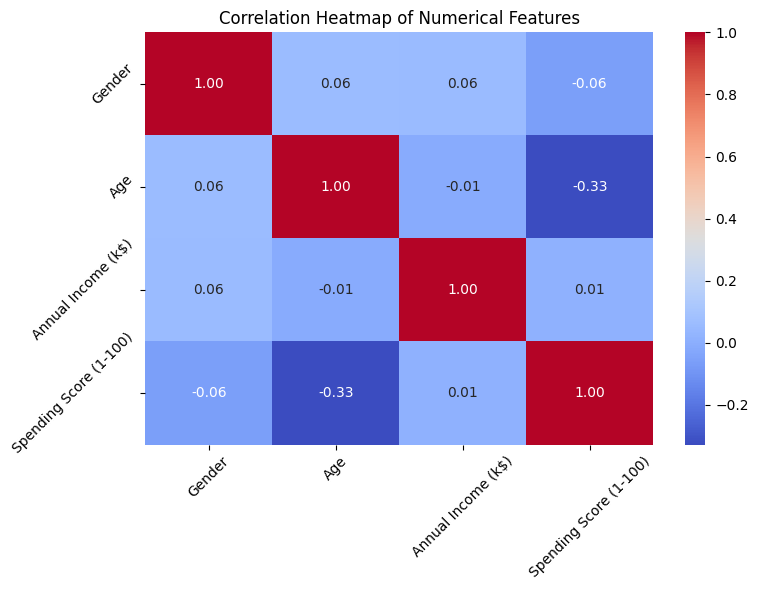

In [30]:
import seaborn as sns

def plot_correlation_heatmap(data):
    """
    Generate a heatmap showing the correlation matrix of numerical variables.

    Args:
        data (DataFrame): Dataset with numerical features.

    Returns:
        None
    """
    # Compute the correlation matrix
    correlation_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Perform correlation analysis
plot_correlation_heatmap(preprocessed_data)

Step 3:

In this step, we identify the optimal number of clusters using the Elbow Method. We run the K-means algorithm for different cluster counts (k) ranging from 2 to 10 and compute the inertia for each value of k. By plotting the inertia, we can identify the "elbow point" where adding more clusters provides diminishing returns.

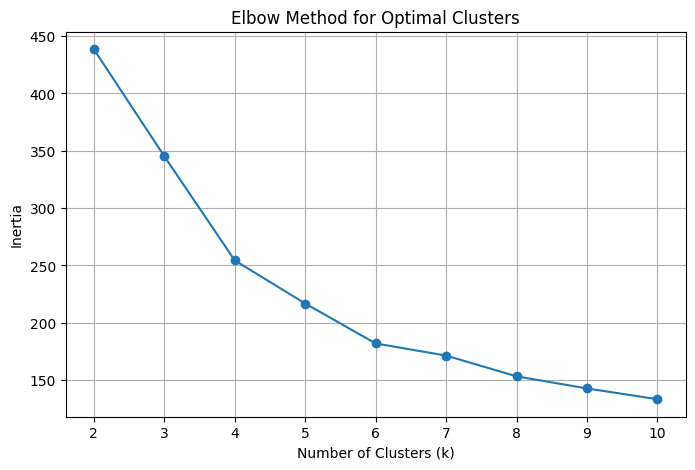

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def determine_optimal_clusters(data, max_clusters=10):
    """
    Determine the optimal number of clusters using the Elbow Method.

    Args:
        data (DataFrame): Preprocessed data for clustering.
        max_clusters (int): Maximum number of clusters to evaluate.

    Returns:
        list: Inertia values for each cluster count.
    """
    inertia = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertia

# Run Elbow Method
elbow_inertia = determine_optimal_clusters(preprocessed_data)

Step 4:

With the optimal number of clusters identified from the Elbow Method, we now apply the K-means clustering algorithm to segment the dataset. Each data point is assigned a cluster label. To visualize the clusters effectively, we use PCA to project the data into a 2D space. The resulting scatter plot highlights the distinct clusters formed by the algorithm.



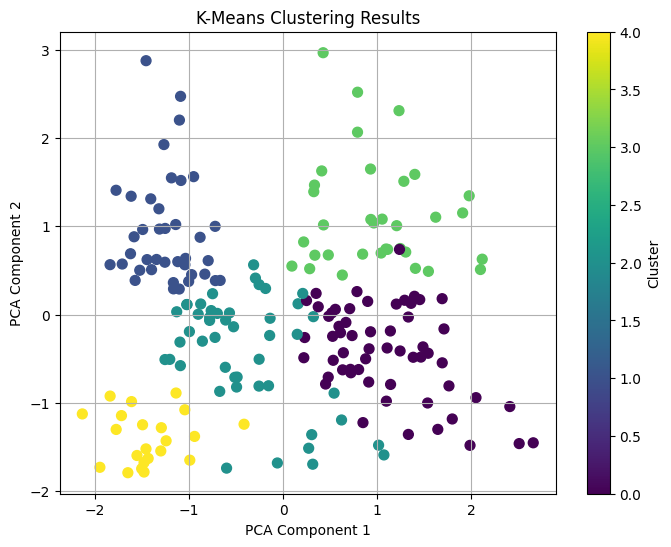

In [ ]:
from sklearn.decomposition import PCA

def apply_kmeans(data, n_clusters):
    """
    Apply K-means clustering and visualize the results using PCA.

    Args:
        data (DataFrame): Preprocessed data for clustering.
        n_clusters (int): Optimal number of clusters.

    Returns:
        array: Cluster labels for each data point.
    """
    # Fit K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Add cluster labels to the original data
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = cluster_labels

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title('K-Means Clustering Results')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()

    return cluster_labels

# Apply K-means with optimal clusters (based on Elbow Curve, choose k=5 as an example)
optimal_clusters = 5
cluster_labels = apply_kmeans(preprocessed_data, optimal_clusters)

**Step 5: Cluster Profiling with Visualizations**

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Use the optimal number of clusters from the elbow method
kmeans.fit(preprocessed_data)

# Get cluster labels
cluster_labels = kmeans.labels_


Cluster Profiles:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        1.198627           -0.460981               -0.327038
1       -0.441917            0.991583                1.239503
2       -0.781722           -0.403069               -0.215914
3        0.173295            1.066454               -1.298010
4       -0.974396           -1.329545                1.132178


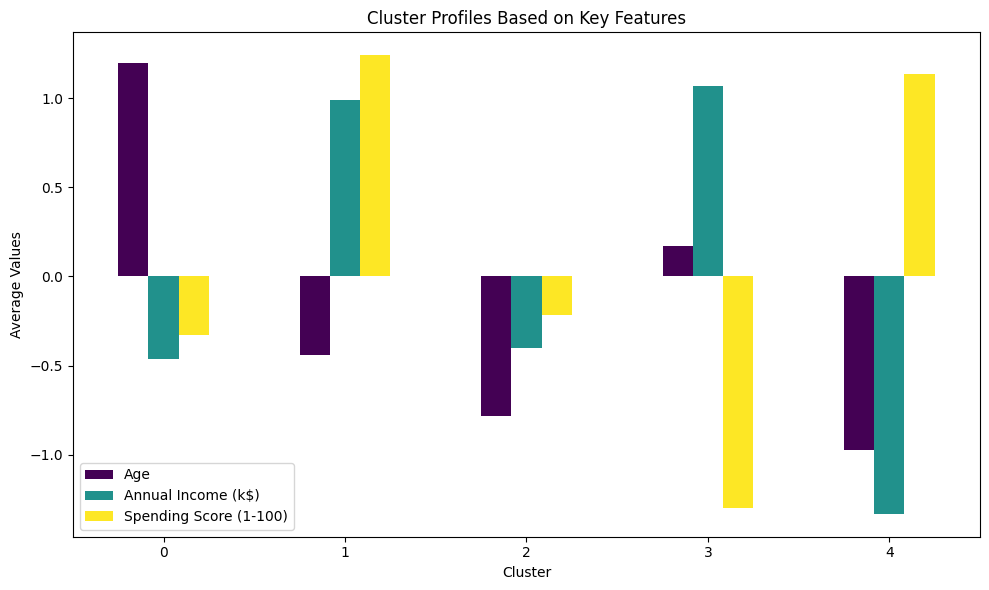

In [ ]:
# Features for analysis
feature_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Perform cluster profiling
cluster_profiles = analyze_clusters(preprocessed_data, cluster_labels, feature_columns)


**Predictive Modeling (Regression Analysis)**

In this step, we will build a regression model to predict the Spending Score (1-100) based on the other features such as Age and Annual Income. This can help us understand how customer attributes impact spending behavior.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def prepare_regression_data(data, feature_columns, target_column):
    """
    Prepare the data for regression modeling by splitting into train and test sets.

    Args:
    - data (pd.DataFrame): Preprocessed data.
    - feature_columns (list): Columns to use as predictors.
    - target_column (str): Column to use as the target variable.

    Returns:
    - X_train, X_test, y_train, y_test (arrays): Split data ready for modeling.
    """
    X = data[feature_columns]
    y = data[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Select features and target
feature_columns = ['Age', 'Annual Income (k$)']
target_column = 'Spending Score (1-100)'

# Split the data
X_train, X_test, y_train, y_test = prepare_regression_data(preprocessed_data, feature_columns, target_column)

print("Data prepared for regression. Training set size:", X_train.shape[0])

Data prepared for regression. Training set size: 160


Step 2: Build and Evaluate the Regression Model

In [ ]:
def build_and_evaluate_regression_model(X_train, X_test, y_train, y_test):
    """
    Build and evaluate a linear regression model.

    Args:
    - X_train, X_test (arrays): Predictor variables for training and testing.
    - y_train, y_test (arrays): Target variables for training and testing.

    Returns:
    - model (LinearRegression): Trained regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

    return model, y_pred

# Train and evaluate the model
regression_model, y_pred = build_and_evaluate_regression_model(X_train, X_test, y_train, y_test)

Model Evaluation:
Mean Squared Error (MSE): 0.73
R-squared (R²): 0.02


Step 3: Visualize Results

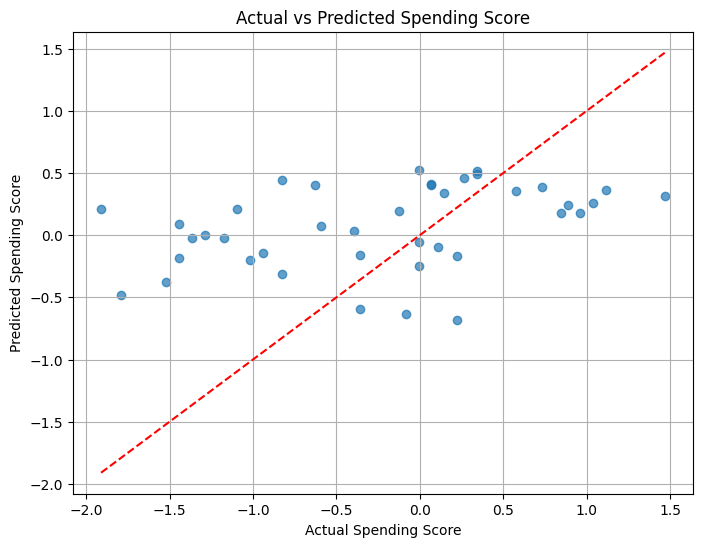

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values for regression analysis.

    Args:
    - y_test (array): True target values.
    - y_pred (array): Predicted target values by the model.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Spending Score")
    plt.ylabel("Predicted Spending Score")
    plt.title("Actual vs Predicted Spending Score")
    plt.grid()
    plt.show()

# Visualize results
plot_actual_vs_predicted(y_test, y_pred)